In [1]:
import pandas as pd
import numpy as np

# Caricamento dataset ottenuto da ProfilingUD

In [2]:
df = pd.read_csv('6918.csv', sep='\t')

In [3]:
df.head()

,Filename,n_sentences,n_tokens,tokens_per_sent,char_per_tok,ttr_lemma_chunks_100,ttr_form_chunks_100,upos_dist_ADJ,upos_dist_ADP,upos_dist_ADV,...,principal_proposition_dist,subordinate_proposition_dist,subordinate_post,subordinate_pre,avg_subordinate_chain_len,subordinate_dist_1,subordinate_dist_2,subordinate_dist_3,subordinate_dist_4,subordinate_dist_5
0,FB_profilingUD_input/2186-train-0-.conllu,1,5,5.0,2.400000,0.0,0.0,20.000000,20.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
1,FB_profilingUD_input/738-train-0-.conllu,2,13,6.5,5.333333,0.0,0.0,0.000000,7.692308,23.076923,...,50.000000,50.000000,100.0,0.0,1.00,100.0,0.0,0.0,0.0,0.0
2,FB_profilingUD_input/926-train-1-.conllu,2,22,11.0,4.142857,0.0,0.0,13.636364,13.636364,9.090909,...,100.000000,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
3,FB_profilingUD_input/647-test-0-.conllu,1,8,8.0,4.125000,0.0,0.0,12.500000,0.000000,0.000000,...,100.000000,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
4,FB_profilingUD_input/2210-train-0-.conllu,2,52,26.0,4.600000,0.0,0.0,3.846154,11.538462,7.692308,...,16.666667,83.333333,0.0,100.0,1.25,75.0,25.0,0.0,0.0,0.0


In [4]:
df.shape

(4000, 137)

## Divisione in training e test set

In [5]:
df_train = df[df['Filename'].str.contains("train")]
df_train = df_train.reset_index(drop=True)

In [6]:
df_train.head()

,Filename,n_sentences,n_tokens,tokens_per_sent,char_per_tok,ttr_lemma_chunks_100,ttr_form_chunks_100,upos_dist_ADJ,upos_dist_ADP,upos_dist_ADV,...,principal_proposition_dist,subordinate_proposition_dist,subordinate_post,subordinate_pre,avg_subordinate_chain_len,subordinate_dist_1,subordinate_dist_2,subordinate_dist_3,subordinate_dist_4,subordinate_dist_5
0,FB_profilingUD_input/2186-train-0-.conllu,1,5,5.0,2.400000,0.0,0.0,20.000000,20.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
1,FB_profilingUD_input/738-train-0-.conllu,2,13,6.5,5.333333,0.0,0.0,0.000000,7.692308,23.076923,...,50.000000,50.000000,100.0,0.0,1.00,100.0,0.0,0.0,0.0,0.0
2,FB_profilingUD_input/926-train-1-.conllu,2,22,11.0,4.142857,0.0,0.0,13.636364,13.636364,9.090909,...,100.000000,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
3,FB_profilingUD_input/2210-train-0-.conllu,2,52,26.0,4.600000,0.0,0.0,3.846154,11.538462,7.692308,...,16.666667,83.333333,0.0,100.0,1.25,75.0,25.0,0.0,0.0,0.0
4,FB_profilingUD_input/1624-train-1-.conllu,1,4,4.0,5.750000,0.0,0.0,0.000000,25.000000,0.000000,...,100.000000,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0


In [7]:
df_train.shape

(3000, 137)

In [8]:
df_test = df[df['Filename'].str.contains("test")]
df_test = df_test.reset_index(drop=True)

In [9]:
df_test.head()

,Filename,n_sentences,n_tokens,tokens_per_sent,char_per_tok,ttr_lemma_chunks_100,ttr_form_chunks_100,upos_dist_ADJ,upos_dist_ADP,upos_dist_ADV,...,principal_proposition_dist,subordinate_proposition_dist,subordinate_post,subordinate_pre,avg_subordinate_chain_len,subordinate_dist_1,subordinate_dist_2,subordinate_dist_3,subordinate_dist_4,subordinate_dist_5
0,FB_profilingUD_input/647-test-0-.conllu,1,8,8.0,4.125000,0.0,0.0,12.5,0.000000,0.000000,...,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,FB_profilingUD_input/673-test-1-.conllu,1,30,30.0,4.800000,0.0,0.0,10.0,3.333333,3.333333,...,20.0,80.0,100.0,0.0,1.0,100.0,0.0,0.0,0.0,0.0
2,FB_profilingUD_input/768-test-0-.conllu,1,2,2.0,3.500000,0.0,0.0,0.0,0.000000,0.000000,...,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,FB_profilingUD_input/339-test-0-.conllu,1,11,11.0,5.727273,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,FB_profilingUD_input/586-test-1-.conllu,2,33,16.5,4.062500,0.0,0.0,0.0,9.090909,9.090909,...,50.0,50.0,100.0,0.0,2.0,0.0,100.0,0.0,0.0,0.0


In [10]:
df_test.shape

(1000, 137)

## Creazione delle liste di etichette

In [11]:
y_train = [int(file_name.split('-')[2]) for file_name in df_train.Filename]
y_test = [int(file_name.split('-')[2]) for file_name in df_test.Filename]

In [12]:
len(y_train), len(y_test)

(3000, 1000)

In [13]:
df_train = df_train.drop(columns='Filename')

In [14]:
df_train.head()

,n_sentences,n_tokens,tokens_per_sent,char_per_tok,ttr_lemma_chunks_100,ttr_form_chunks_100,upos_dist_ADJ,upos_dist_ADP,upos_dist_ADV,upos_dist_AUX,...,principal_proposition_dist,subordinate_proposition_dist,subordinate_post,subordinate_pre,avg_subordinate_chain_len,subordinate_dist_1,subordinate_dist_2,subordinate_dist_3,subordinate_dist_4,subordinate_dist_5
0,1,5,5.0,2.400000,0.0,0.0,20.000000,20.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
1,2,13,6.5,5.333333,0.0,0.0,0.000000,7.692308,23.076923,0.000000,...,50.000000,50.000000,100.0,0.0,1.00,100.0,0.0,0.0,0.0,0.0
2,2,22,11.0,4.142857,0.0,0.0,13.636364,13.636364,9.090909,4.545455,...,100.000000,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
3,2,52,26.0,4.600000,0.0,0.0,3.846154,11.538462,7.692308,11.538462,...,16.666667,83.333333,0.0,100.0,1.25,75.0,25.0,0.0,0.0,0.0
4,1,4,4.0,5.750000,0.0,0.0,0.000000,25.000000,0.000000,0.000000,...,100.000000,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0


In [15]:
df_test = df_test.drop(columns='Filename')
df_test.head()

,n_sentences,n_tokens,tokens_per_sent,char_per_tok,ttr_lemma_chunks_100,ttr_form_chunks_100,upos_dist_ADJ,upos_dist_ADP,upos_dist_ADV,upos_dist_AUX,...,principal_proposition_dist,subordinate_proposition_dist,subordinate_post,subordinate_pre,avg_subordinate_chain_len,subordinate_dist_1,subordinate_dist_2,subordinate_dist_3,subordinate_dist_4,subordinate_dist_5
0,1,8,8.0,4.125000,0.0,0.0,12.5,0.000000,0.000000,0.000000,...,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,30,30.0,4.800000,0.0,0.0,10.0,3.333333,3.333333,6.666667,...,20.0,80.0,100.0,0.0,1.0,100.0,0.0,0.0,0.0,0.0
2,1,2,2.0,3.500000,0.0,0.0,0.0,0.000000,0.000000,50.000000,...,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,11,11.0,5.727273,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,33,16.5,4.062500,0.0,0.0,0.0,9.090909,9.090909,0.000000,...,50.0,50.0,100.0,0.0,2.0,0.0,100.0,0.0,0.0,0.0


In [16]:
df_train.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

In [17]:
df_test.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

# Normalizzazione

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(df_train)
X_test = scaler.transform(df_test)

# Classificazione

## Model selection rispetto a C

In [20]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_validate, KFold, cross_val_predict
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, f1_score

import matplotlib.pyplot as plt

In [21]:
splitter = KFold(n_splits=5, random_state=42, shuffle=True)

In [22]:
df = pd.DataFrame(np.array([0.0001, 0.001, 0.01, 0.1, 1]), columns = ['C'])
df

,C
0,0.0001
1,0.0010
2,0.0100
3,0.1000
4,1.0000


In [23]:
for i, c in enumerate(df['C']): # proviamo diversi valori dell'iperparametro regolarizzatore C
    svc = LinearSVC(dual=False, C=c)
    svc.fit(X_train, y_train) # addestriamo il modello con il valore di C da valutare
    df.loc[i, 'training_accuracy'] = svc.score(X_train, y_train) # inseriamo l'accuracy di training ottenuta nel dataset
    scores = cross_validate(svc, X_train, y_train, scoring='accuracy', cv=splitter) # effettuiamo la Cross Validation
    df.loc[i, 'val_accuracy'] = scores['test_score'].mean()
    df.loc[i, 'val_accuracy_std'] = scores['test_score'].std()

In [24]:
df

,C,training_accuracy,val_accuracy,val_accuracy_std
0,0.0001,0.646667,0.640000,0.018348
1,0.0010,0.672667,0.660000,0.014832
2,0.0100,0.693667,0.682000,0.011709
3,0.1000,0.709667,0.687333,0.004422
4,1.0000,0.714000,0.684333,0.005925


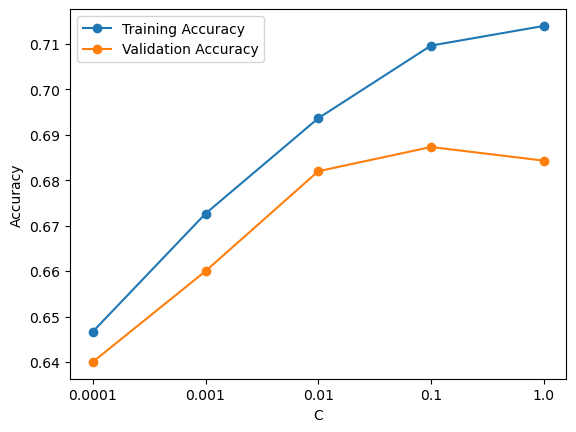

In [25]:
x_ticks = np.arange(len(df['C']))

plt.plot(x_ticks, df['training_accuracy'], 'o-', label='Training Accuracy')
plt.plot(x_ticks, df['val_accuracy'], 'o-', label='Validation Accuracy')

plt.xlabel('C')
plt.ylabel('Accuracy')

plt.xticks(x_ticks, df['C'])  # Imposta gli etichette degli assi x con i valori di C
plt.legend()
plt.savefig('C_parameter.pdf', dpi=300, bbox_inches='tight')
plt.show()

Il migliore valore di C è 0,1, in quanto ottiene l'accuracy più alta sul validation set: in particolare, ottiene 0.71 sul training set e 0.687 come media delle cinque fold di validation.

Calcolo anche l'F1 score medio sulle 5 fold, addestrando un SVC direttamente con il valore di C selezionato.

In [26]:
best_SVC = LinearSVC(dual=False, C=0.1)
best_SVC.fit(X_train, y_train)
scores = cross_validate(best_SVC, X_train, y_train, scoring='f1', cv=splitter)
scores['test_score'].mean()

0.6489034936514321

L'F-1 score  medio è dello 0,649.

In [27]:
scores['test_score'].std()

0.011166891211490811

# Valutazione sul test set

In [28]:
y_test_pred = best_SVC.predict(X_test)
print(classification_report(y_test, y_test_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.46      0.61      0.52       323
           1       0.78      0.66      0.71       677

    accuracy                           0.64      1000
   macro avg       0.62      0.63      0.62      1000
weighted avg       0.68      0.64      0.65      1000



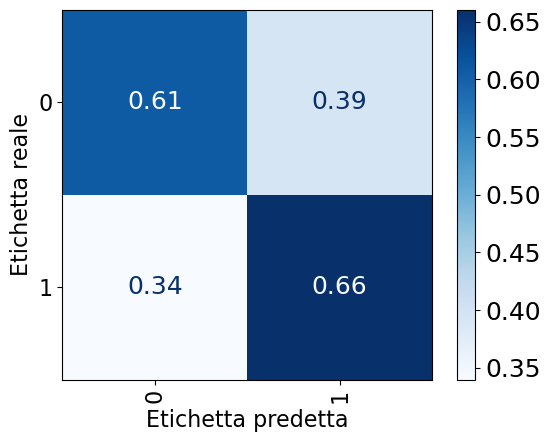

In [29]:
plt.rcParams.update({'font.size': 18})
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, xticks_rotation='vertical', cmap='Blues', normalize='true')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Etichetta predetta', fontsize=16)
plt.ylabel('Etichetta reale', fontsize=16)
plt.savefig('conf_matrix_SVC_profiling.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [30]:
accuracy_score(y_test_pred, y_test)

0.643

## Confronto con una baseline

In [31]:
from sklearn.dummy import DummyClassifier

In [32]:
dummy = DummyClassifier()

In [33]:
dummy.fit(X_train, y_train)

DummyClassifier()

In [34]:
dummy_scores = cross_validate(dummy, X_train, y_train, scoring='accuracy', cv=splitter)
dummy_scores['test_score'].mean()

0.5393333333333332

In [35]:
y_test_dummy = dummy.predict(X_test)

In [36]:
accuracy_score(y_test_dummy, y_test)

0.323

# Feature importance

In [37]:
svc.classes_

array([0, 1])

In [38]:
coefs = svc.coef_
coefs.shape

(1, 136)

Essendo un task di classificazione binaria, svc.coef_ ha forma (1, n_features).

In [39]:
coefs

array([[ 1.64855013, -0.03771585,  0.32961229,  0.00704864, -0.43865979,
        -0.41078737,  0.73575747,  0.294221  , -0.42837365,  0.16045549,
        -0.49603479,  1.06218638, -0.60928259,  0.1900475 , -0.07126127,
         0.04276914, -0.59898957,  0.44962878, -0.54630334, -0.76946959,
         0.22249814, -0.25017983,  0.28133131, -0.18764171, -0.07547141,
        -0.21611077,  0.13618448, -0.04665369,  0.1001611 , -0.030262  ,
         0.00211686, -0.37968081, -0.32904873, -0.14209424, -0.17509939,
         0.        , -0.18143259,  0.22796631,  0.27365217, -0.08934785,
        -0.23141266,  0.0259369 , -0.5352526 ,  0.01147893, -0.49102769,
        -0.1019933 , -0.20691835, -0.10846398, -0.12051773, -0.23583707,
         0.25447694,  0.29372672, -0.01961477,  0.09682382, -0.21089522,
        -0.03548335,  0.23355978, -0.20472097, -0.2027438 , -0.25145358,
         0.2420915 , -0.14543635,  0.15477799,  0.27821116,  0.17127978,
         0.28824839,  0.33442758,  0.33331399,  0.5

In [40]:
features_names = df_train.columns

In [41]:
features_names

Index(['n_sentences', 'n_tokens', 'tokens_per_sent', 'char_per_tok',
       'ttr_lemma_chunks_100', 'ttr_form_chunks_100', 'upos_dist_ADJ',
       'upos_dist_ADP', 'upos_dist_ADV', 'upos_dist_AUX',
       ...
       'principal_proposition_dist', 'subordinate_proposition_dist',
       'subordinate_post', 'subordinate_pre', 'avg_subordinate_chain_len',
       'subordinate_dist_1', 'subordinate_dist_2', 'subordinate_dist_3',
       'subordinate_dist_4', 'subordinate_dist_5'],
      dtype='object', length=136)

In [42]:
feature_importances = {feature_name: coef for feature_name, coef in zip(features_names, coefs[0])}

In [43]:
feature_importances

{'n_sentences': 1.6485501340288593,
 'n_tokens': -0.03771585059997649,
 'tokens_per_sent': 0.32961228513511837,
 'char_per_tok': 0.007048636156835955,
 'ttr_lemma_chunks_100': -0.43865979228516844,
 'ttr_form_chunks_100': -0.41078737152682077,
 'upos_dist_ADJ': 0.7357574691661758,
 'upos_dist_ADP': 0.294221003926604,
 'upos_dist_ADV': -0.4283736534001571,
 'upos_dist_AUX': 0.1604554894668659,
 'upos_dist_CCONJ': -0.49603478539200874,
 'upos_dist_DET': 1.062186382825097,
 'upos_dist_INTJ': -0.6092825926579967,
 'upos_dist_NOUN': 0.19004750127070894,
 'upos_dist_NUM': -0.0712612656001552,
 'upos_dist_PRON': 0.042769139665843815,
 'upos_dist_PROPN': -0.5989895708949909,
 'upos_dist_PUNCT': 0.4496287777995029,
 'upos_dist_SCONJ': -0.5463033355725553,
 'upos_dist_SYM': -0.7694695856705459,
 'upos_dist_VERB': 0.22249814094310788,
 'upos_dist_X': -0.2501798321313151,
 'lexical_density': 0.28133130587173144,
 'verbs_tense_dist_Fut': -0.18764170748655354,
 'verbs_tense_dist_Imp': -0.07547140720

In [44]:
sorted_feature_importances = dict(sorted(feature_importances.items(), key=lambda item: item[1], reverse=True))

In [45]:
sorted_feature_importances

{'n_sentences': 1.6485501340288593,
 'dep_dist_nummod': 1.21906653404589,
 'upos_dist_DET': 1.062186382825097,
 'avg_subordinate_chain_len': 0.9336348085833844,
 'upos_dist_ADJ': 0.7357574691661758,
 'dep_dist_conj': 0.6779371357540999,
 'dep_dist_nmod': 0.6495563206263681,
 'subordinate_dist_5': 0.575437467026227,
 'verb_edges_dist_5': 0.5440591016539582,
 'dep_dist_advcl': 0.49910233472982507,
 'dep_dist_mark': 0.4553300122700411,
 'upos_dist_PUNCT': 0.4496287777995029,
 'dep_dist_iobj': 0.4490275358122492,
 'dep_dist_acl': 0.4442156063934148,
 'dep_dist_flat:name': 0.4321111249906156,
 'avg_max_depth': 0.4071921288548135,
 'dep_dist_expl:pass': 0.3844908917513713,
 'dep_dist_cop': 0.37511882065608615,
 'max_links_len': 0.3660248764020124,
 'dep_dist_aux': 0.35857921828958683,
 'subordinate_dist_4': 0.3441590958691118,
 'verb_edges_dist_3': 0.33442757923597255,
 'verb_edges_dist_4': 0.33331398718021893,
 'tokens_per_sent': 0.32961228513511837,
 'subordinate_post': 0.3088089850233849,

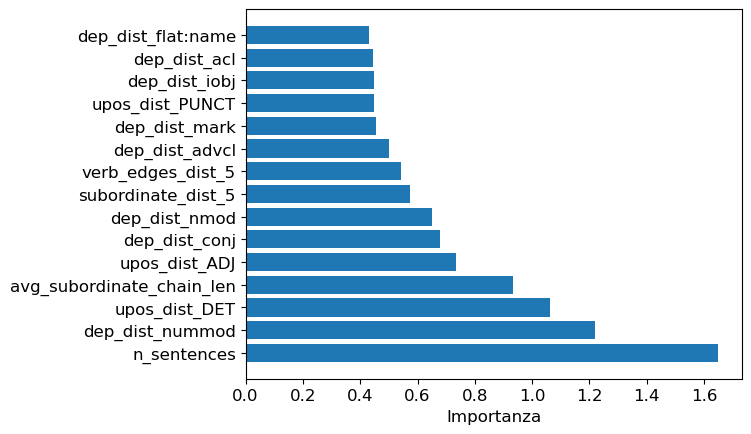

In [46]:
num_to_plot = 15
plt.rcParams.update({'font.size': 12})
plt.barh(range(num_to_plot), list(sorted_feature_importances.values())[:num_to_plot])
plt.yticks(range(num_to_plot), list(sorted_feature_importances.keys())[:num_to_plot])
plt.xlabel('Importanza')
plt.savefig('feature_importanti.pdf', dpi=300, bbox_inches='tight')
plt.show()